# Stock Market Prediction And Forecasting Using LSTM

In [ ]:
By: Madhunisha M V

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Data Exploration

In [2]:
# Load the dataset
df = pd.read_csv("C:\\Users\\kmpvi\\Documents\\ML Project\\Stock.csv")

In [3]:
# Display the dataset
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
df.head(8)

First few rows of the dataset:


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70


In [5]:
# Display the last few rows of the dataset
print("\nLast few rows of the dataset:")
df.tail(7)


Last few rows of the dataset:


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2028,2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134,2791.03
2029,2010-07-28,118.0,120.50,117.20,118.15,118.25,835593,994.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [6]:
# Get the shape of the dataset (number of rows and columns)
print("\nShape of the dataset:")
df.shape


Shape of the dataset:


(2035, 8)

In [7]:
# Display information about the dataset
print("\nInformation about the dataset:")
df.info()



Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [8]:
# Display the column names of the dataset
print("\nColumn names of the dataset:")
df.columns



Column names of the dataset:


Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [9]:
# Display descriptive statistics of the dataset
print("\nDescriptive statistics of the dataset:")
df.describe()



Descriptive statistics of the dataset:


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [10]:
# Check for missing values in the dataset and display the sum of missing values for each column
print("\nSum of missing values for each column:")
df.isnull().sum()



Sum of missing values for each column:


Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

# Data Preprocessing and Visualization

C:\Users\kmpvi\AppData\Local\Temp\ipykernel_15752\852236242.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap=custom_palette)


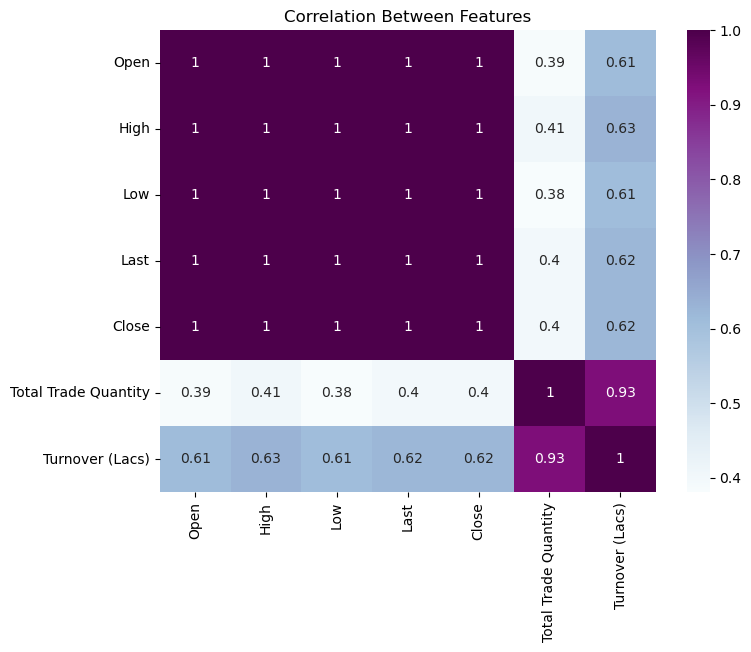

In [11]:
# Visualize the correlation between features using a heatmap
custom_palette = sns.color_palette("BuPu", as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap=custom_palette)
plt.title('Correlation Between Features')
plt.show()

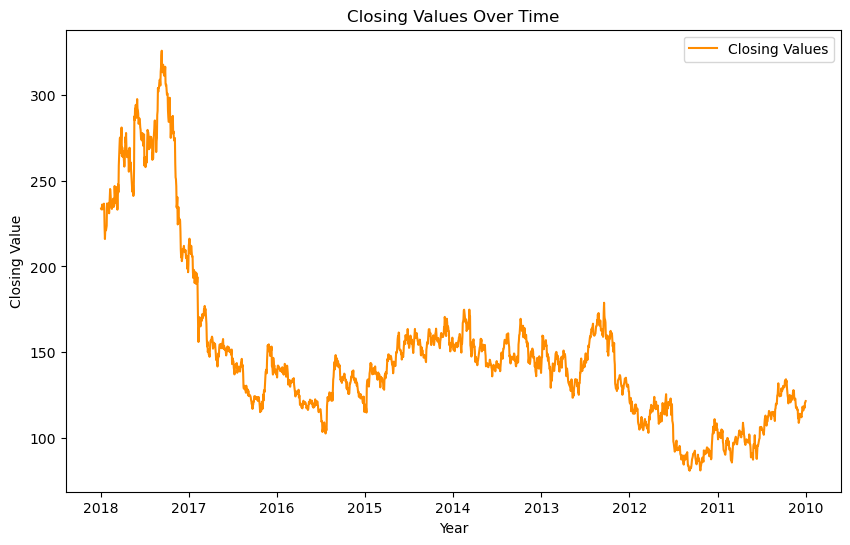

In [12]:
# Extract the 'High' column from the dataset
df_high = df['High'].values.reshape(-1, 1)

# Extract the closing values of the shares and assign an index to each value
closing_values = df['Close'].values
index = np.arange(1, len(closing_values) + 1)

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Date'] = pd.to_datetime(df['Date'])
years = df['Date'].dt.year.unique()

# Plot the closing values over time
plt.figure(figsize=(10, 6))
plt.plot(index, closing_values, label='Closing Values', color='darkorange')
plt.title('Closing Values Over Time')
plt.xlabel('Year')
plt.ylabel('Closing Value')
plt.xticks(np.linspace(0, len(closing_values), len(years)), years)
plt.legend()
plt.show()

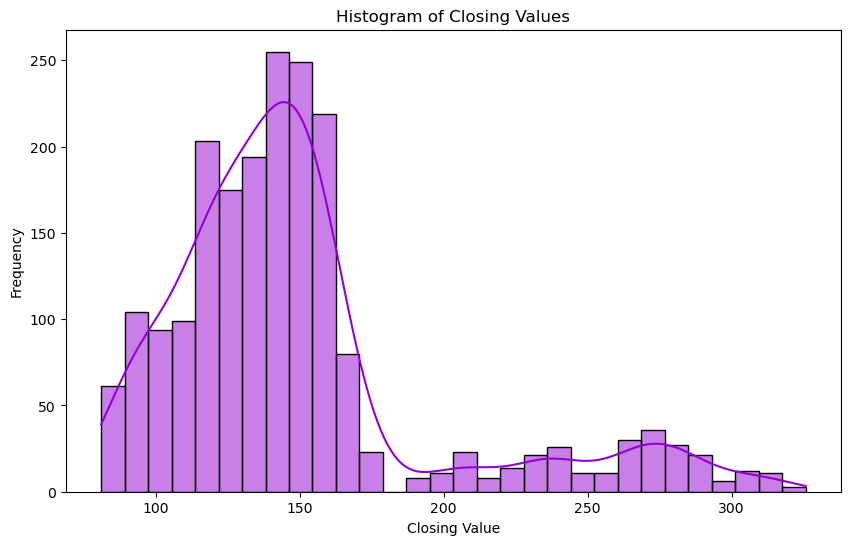

In [13]:
# Histogram plot for the 'Close' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=30, kde=True, color='darkviolet')
plt.title('Histogram of Closing Values')
plt.xlabel('Closing Value')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
closing_values_normalized = scaler.fit_transform(closing_values.reshape(-1, 1))

# Normalize the 'High' column using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df_high = scaler.fit_transform(df_high)

# Get the shape of the normalized data
print("\nShape of the normalized data:")
print(df_high.shape)



Shape of the normalized data:
(2035, 1)


In [15]:
# Split the data into training and testing sets
train_size = int(len(df_high) * 0.75)
test_size = len(df_high) - train_size
train_data, test_data = df_high[0:train_size, :], df_high[train_size:len(df_high), :]

# Train and test the data with dataset
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 100  
X, y = create_dataset(closing_values_normalized, time_step)

# Splitting the dataset into training and testing sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Reshape input to be [samples, time steps, features] for LSTM model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [16]:
print(X_train.shape), print(y_train.shape)

(1295, 100, 1)
(1295,)


(None, None)

In [17]:
print(X_test.shape), print(y_test.shape)

(639, 100, 1)
(639,)


(None, None)

# Model Building and Training

In [18]:
# Create a stacked LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


C:\Users\kmpvi\Documents\New folder\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64)


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 203ms/step - loss: 0.0555
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - loss: 0.0038
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - loss: 0.0017
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - loss: 0.0015
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - loss: 0.0014
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - loss: 0.0015
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 0.0013
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - loss: 0.0012
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - loss: 0.0011
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - loss: 0.0014
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - loss: 0.0011
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - loss: 0.0010
Epoch 13/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step - loss: 9.5201e-04
Epoch 14/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - loss: 8.1367e-04
Epoch 15/100
21/21 ━━━━━━━━━━━━━━━

# Model Evaluation and Prediction

In [20]:
import math
from sklearn.metrics import mean_squared_error

# Predictions 
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
165.3738275947686
119.18379482950911


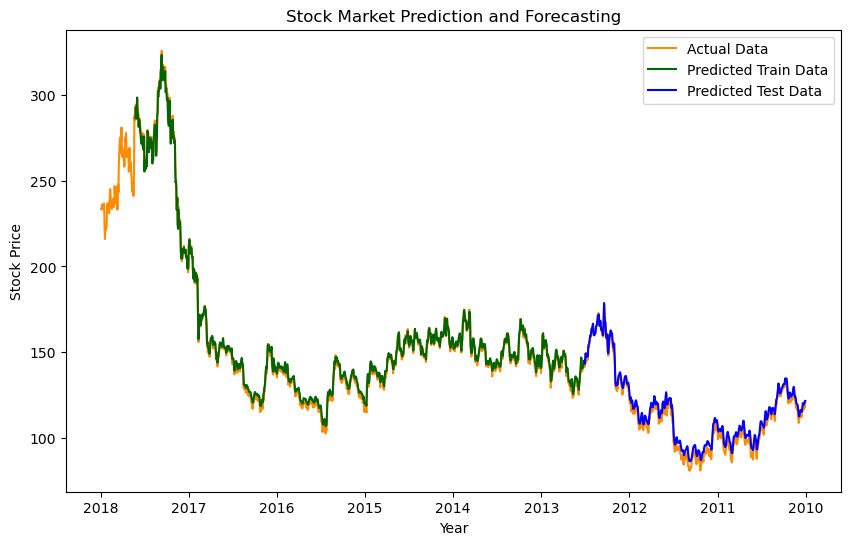

In [21]:
# For the Stock Market Prediction and Forecasting graph
plt.figure(figsize=(10, 6))

# Plotting the actual data
plt.plot(index, closing_values, color='darkorange', label='Actual Data')

# Adjusting the length of train_predict to match np.arange(100, train_size)
train_predict_adjusted = train_predict.reshape(-1)

# Plotting training predictions
plt.plot(np.arange(100, len(train_predict_adjusted) + 100), train_predict_adjusted, color='darkgreen', label='Predicted Train Data')

# Plotting testing predictions
plt.plot(np.arange(len(train_predict_adjusted) + 100, len(train_predict_adjusted) + 100 + len(test_predict)), test_predict, color='blue', label='Predicted Test Data')
plt.title('Stock Market Prediction and Forecasting')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.xticks(np.linspace(0, len(closing_values), len(years)),  years)
plt.legend()
plt.show()